In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d hassaneskikri/online-retail-customer-churn-dataset

Dataset URL: https://www.kaggle.com/datasets/hassaneskikri/online-retail-customer-churn-dataset
License(s): CC0-1.0
  0% 0.00/23.2k [00:00<?, ?B/s]
100% 23.2k/23.2k [00:00<00:00, 92.6MB/s]


In [3]:
!unzip /content/online-retail-customer-churn-dataset.zip

Archive:  /content/online-retail-customer-churn-dataset.zip
  inflating: online_retail_customer_churn.csv  


In [5]:
import pandas as pd
data=pd.read_csv('/content/online-retail-customer-churn-dataset.zip')

In [6]:
data.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [9]:

data.drop(columns=['Annual_Income'], inplace=True)

In [25]:
print(data.shape)
data.info()


(1000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Total_Spend                 1000 non-null   float64
 4   Years_as_Customer           1000 non-null   int64  
 5   Num_of_Purchases            1000 non-null   int64  
 6   Average_Transaction_Amount  1000 non-null   float64
 7   Num_of_Returns              1000 non-null   int64  
 8   Num_of_Support_Contacts     1000 non-null   int64  
 9   Satisfaction_Score          1000 non-null   int64  
 10  Last_Purchase_Days_Ago      1000 non-null   int64  
 11  Email_Opt_In                1000 non-null   bool   
 12  Promotion_Response          1000 non-null   object 
 13  Target_Churn           

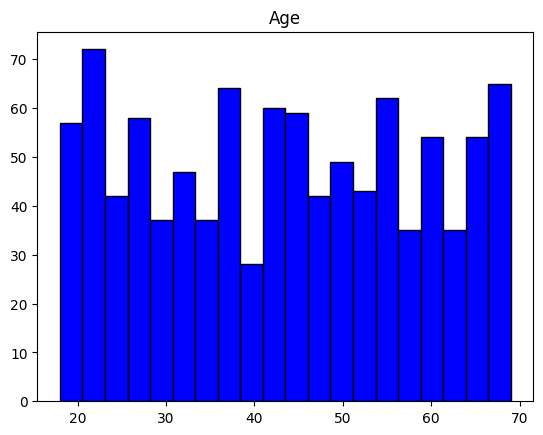

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(data['Age'], bins=20, color='blue', edgecolor='black')
plt.title('Age')
plt.show()



In [27]:
data['Gender'].value_counts()

,count
Gender,
Female,342
Male,334
Other,324


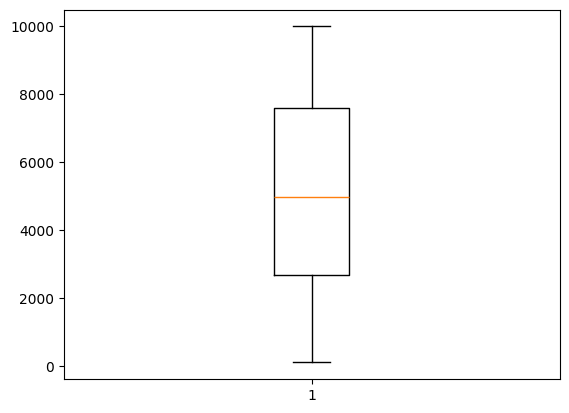

In [28]:
plt.boxplot(data['Total_Spend'])
plt.show()

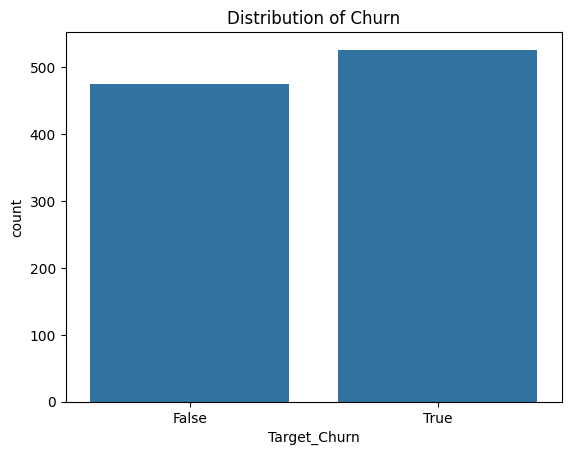

In [32]:
sns.countplot(x='Target_Churn', data=data)
plt.title('Distribution of Churn')
plt.show()

In [54]:
num_features = ['Age', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases',
                'Average_Transaction_Amount', 'Num_of_Returns', 'Num_of_Support_Contacts', 'Satisfaction_Score',
                'Last_Purchase_Days_Ago']




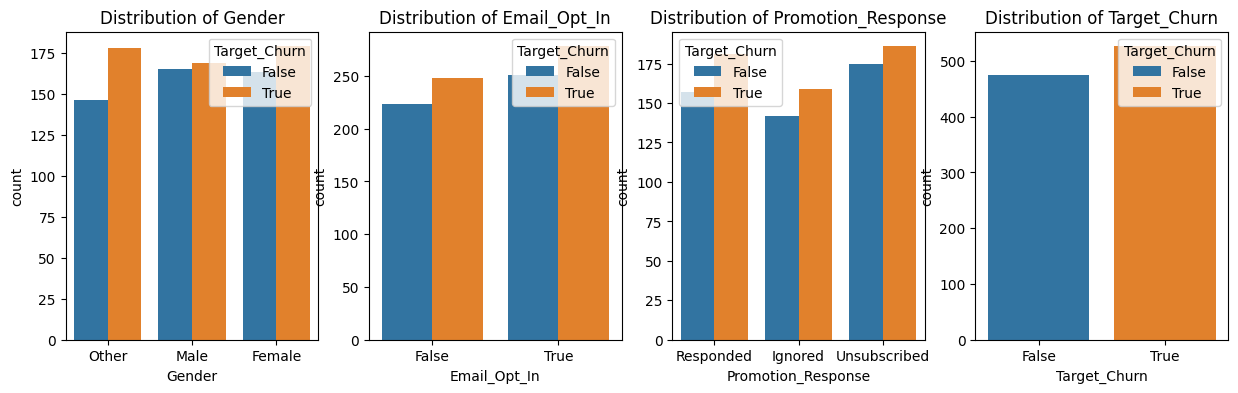

In [43]:
cat_features = ["Gender", "Email_Opt_In", "Promotion_Response", "Target_Churn"]


fig, axes = plt.subplots(nrows=1, ncols=len(cat_features), figsize=(15, 4))
for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, hue='Target_Churn', data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
plt.show()

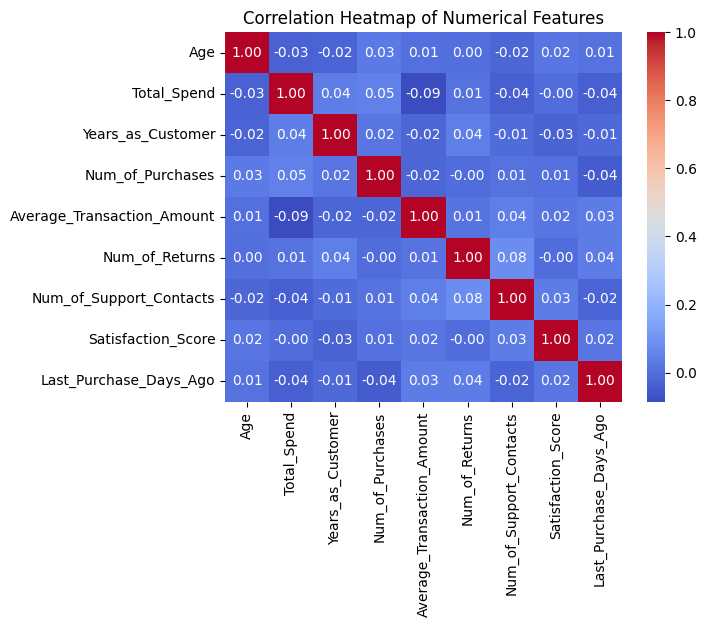

In [46]:
corr_matrix = data[num_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

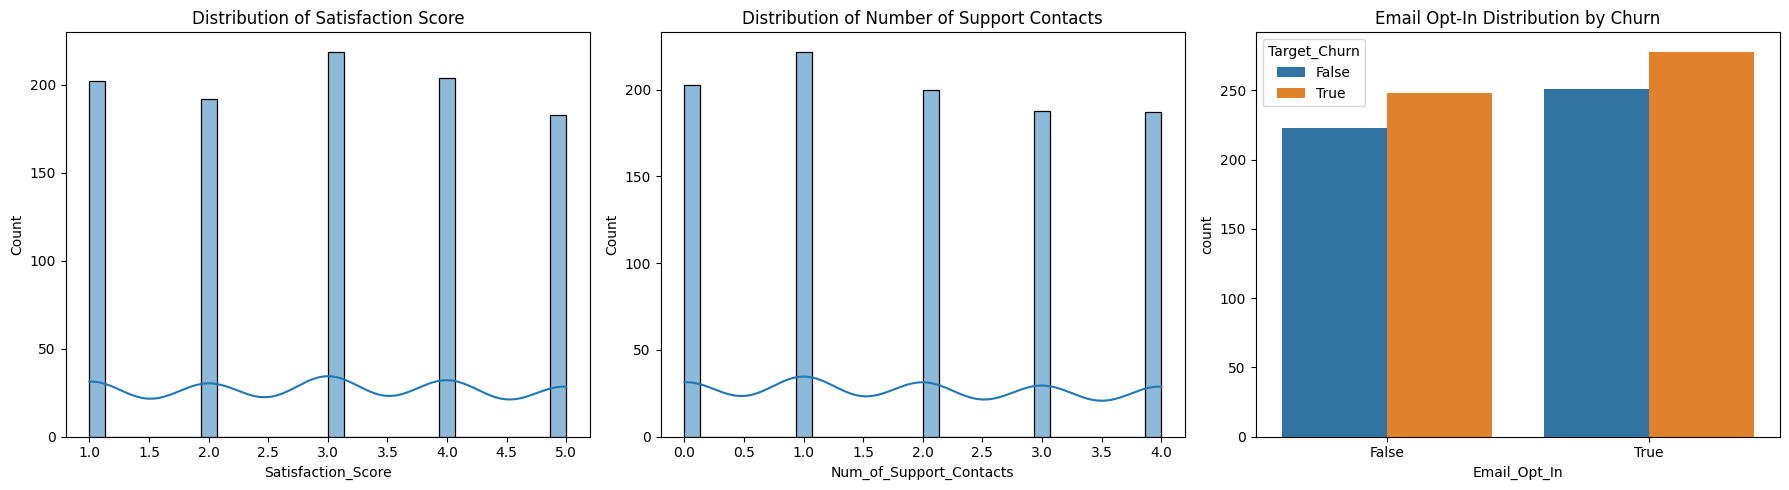

In [51]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))


sns.histplot(x='Satisfaction_Score', data=data, bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Satisfaction Score')


sns.histplot(x='Num_of_Support_Contacts', data=data, bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Number of Support Contacts')


sns.countplot(x='Email_Opt_In', hue='Target_Churn', data=data, ax=axes[2])
axes[2].set_title('Email Opt-In Distribution by Churn')

plt.tight_layout()
plt.show()

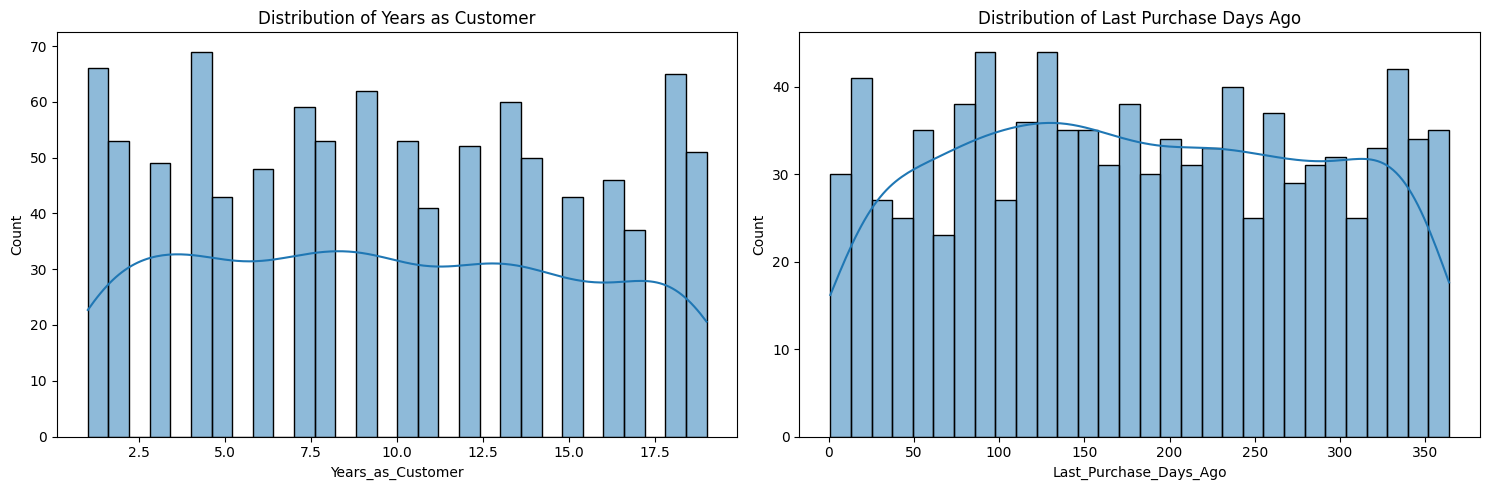

In [53]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


sns.histplot(x='Years_as_Customer', data=data, bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Years as Customer')


sns.histplot(x='Last_Purchase_Days_Ago', data=data, bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Last Purchase Days Ago')

plt.tight_layout()
plt.show()